In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
from google.colab import files
access_csv = files.upload()

Saving iris.csv to iris.csv


In [ ]:
df = pd.read_csv('iris.csv')
df.sample(3)

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
107,107,7.3,2.9,6.3,1.8,versicolor
97,97,6.2,2.9,4.3,1.3,verginica
86,86,6.7,3.1,4.7,1.5,verginica


In [ ]:
le = LabelEncoder()

In [ ]:
df['species'] = le.fit_transform(df['species'])
df

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


In [ ]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
30,4.8,3.1,1.6,0.2,0


In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
X = df.drop(['species'], axis=1)
y = df['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test.shape

(119,)

In [ ]:
model = Sequential()

model.add(Dense(4, activation='relu', input_dim=4))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
3/3 [==============================] - 0s 54ms/step - loss: 0.3584 - accuracy: 0.9579 - val_loss: 0.4347 - val_accuracy: 0.9583
Epoch 2/50
3/3 [==============================] - 0s 20ms/step - loss: 0.3574 - accuracy: 0.9579 - val_loss: 0.4332 - val_accuracy: 0.9583
Epoch 3/50
3/3 [==============================] - 0s 20ms/step - loss: 0.3567 - accuracy: 0.9579 - val_loss: 0.4324 - val_accuracy: 0.9583
Epoch 4/50
3/3 [==============================] - 0s 29ms/step - loss: 0.3559 - accuracy: 0.9579 - val_loss: 0.4324 - val_accuracy: 0.9583
Epoch 5/50
3/3 [==============================] - 0s 19ms/step - loss: 0.3552 - accuracy: 0.9579 - val_loss: 0.4307 - val_accuracy: 0.9583
Epoch 6/50
3/3 [==============================] - 0s 20ms/step - loss: 0.3542 - accuracy: 0.9579 - val_loss: 0.4296 - val_accuracy: 0.9583
Epoch 7/50
3/3 [==============================] - 0s 23ms/step - loss: 0.3537 - accuracy: 0.9579 - val_loss: 0.4307 - val_accuracy: 0.9583
Epoch 8/50
3/3 [===========

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test_Accuracy: {accuracy}')

1/1 [==============================] - 0s 30ms/step - loss: 0.3381 - accuracy: 1.0000
Test_Accuracy: 1.0


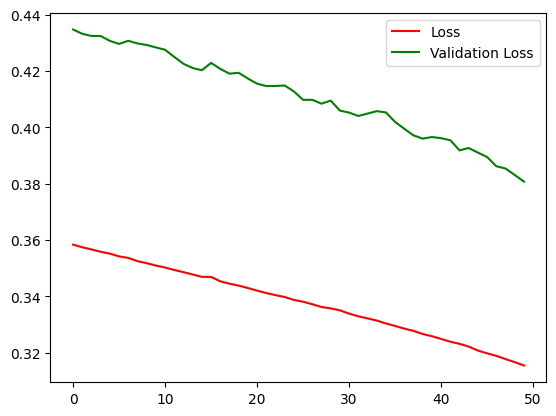

In [ ]:
plt.plot(history.history['loss'], label='Loss', color='r')
plt.plot(history.history['val_loss'], label='Validation Loss', color='g')
plt.legend()

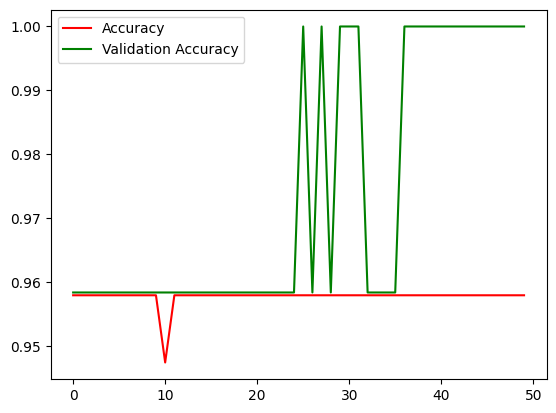

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy', color='r')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='g')
plt.legend()